In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
#일일이 font_size를 지정할 필요 없이, seaborn의 font_scale을 사용하면 편하다.
import missingno as msno # dataset 채워지지 않은 null값을 보여주는 라이브러리

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Dataset 확인

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제에서 feature는 Pclass,Age, SibSp, Parch, Fare이며, 예측하려는 Target label은 Survived이다.

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null Data Check

- :> 오른쪽 정렬
- :.2f : 소숫점

In [6]:
for col in df_train.columns : 
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


- df_train[col] : series 타입

In [7]:
df_train[col].isnull().sum()

2

In [8]:
for col in df_test.columns :
    msg = 'column : {:>10}\t Percent of NaN Value : {:.2f}%'.format(col,100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN Value : 0.00%
column :     Pclass	 Percent of NaN Value : 0.00%
column :       Name	 Percent of NaN Value : 0.00%
column :        Sex	 Percent of NaN Value : 0.00%
column :        Age	 Percent of NaN Value : 20.57%
column :      SibSp	 Percent of NaN Value : 0.00%
column :      Parch	 Percent of NaN Value : 0.00%
column :     Ticket	 Percent of NaN Value : 0.00%
column :       Fare	 Percent of NaN Value : 0.24%
column :      Cabin	 Percent of NaN Value : 78.23%
column :   Embarked	 Percent of NaN Value : 0.00%


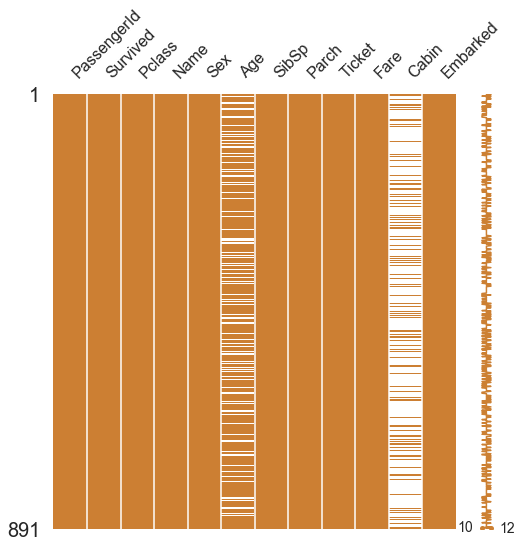

In [9]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

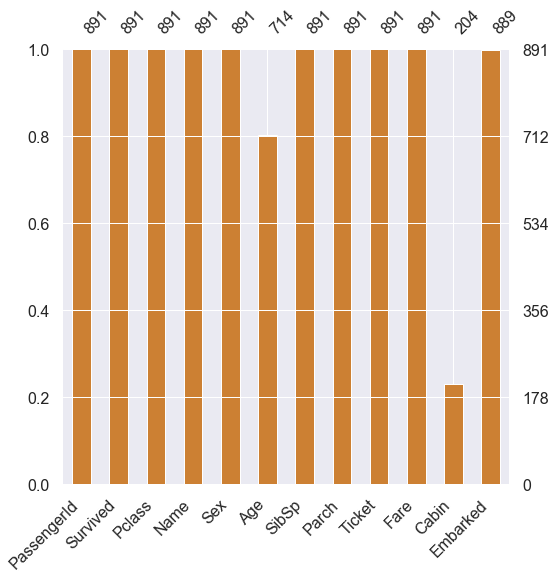

In [10]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

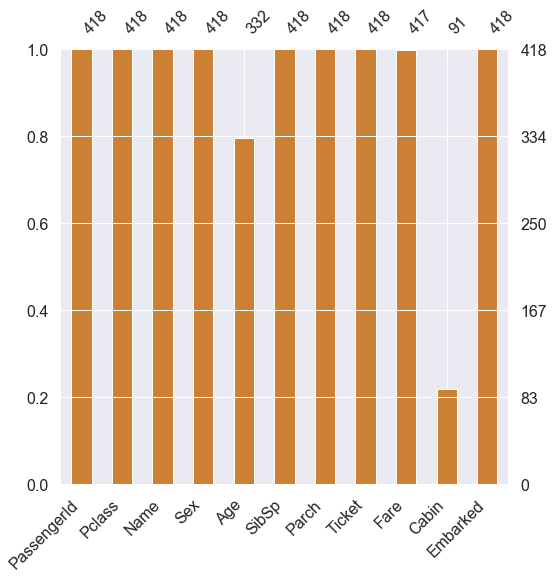

In [11]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Target Label 확인

- 어떤 distribution(분포)를 가지고 있는 지 확인해봐야한다.
- binary 분포에 대해서는 0과1의 분포가 어떤지에 따라 모델의 평가 방법이 달라질 수 있다.

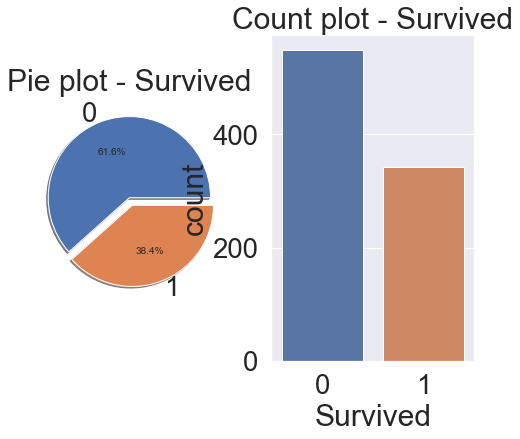

In [12]:
f, ax = plt.subplots(1,2,figsize=(8,6)) # 1이 row, 2는 column
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # label을 없애겠다.
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

- 38.4% 살아남음
- 비교적 balance한 데이터

# 2. EDA(Exploratory Data Analysis)

## 2.1 Pclass

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


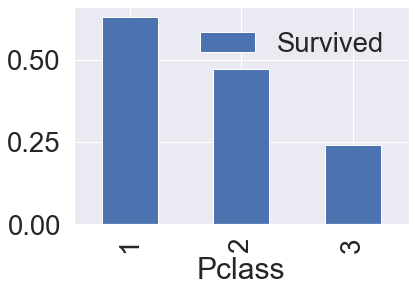

In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar() # Pclass를 index로 두느냐

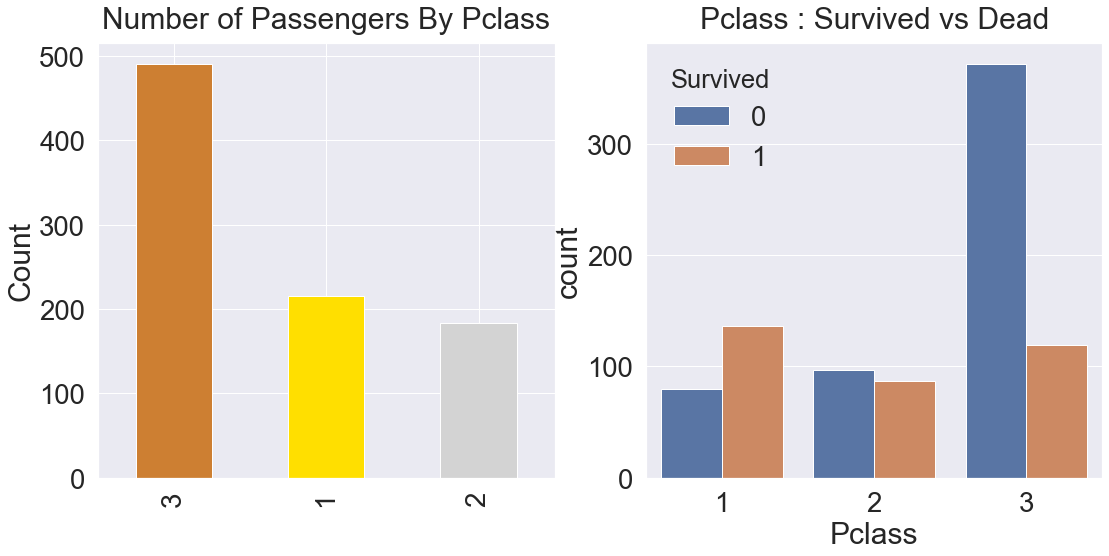

In [17]:
y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1]) # hue 구분시켜주는 것
ax[1].set_title('Pclass : Survived vs Dead',y=y_position)
plt.show()

## 2.2 Sex(성별 생존률 알아보기)

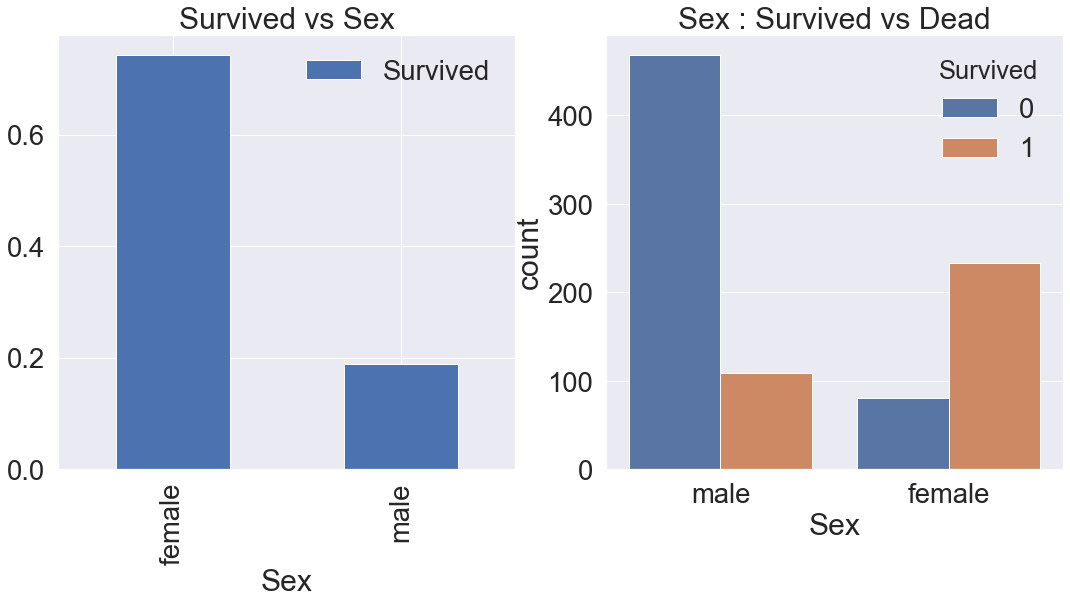

In [18]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby('Sex',as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [19]:
df_train[['Sex','Survived']].groupby('Sex',as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [20]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

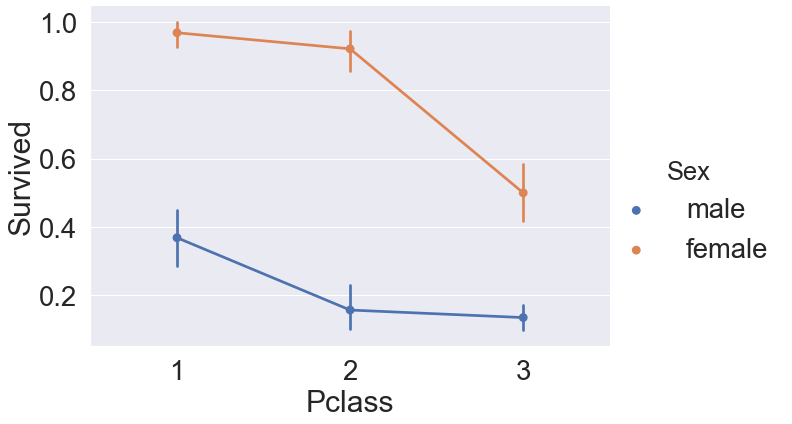

In [21]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

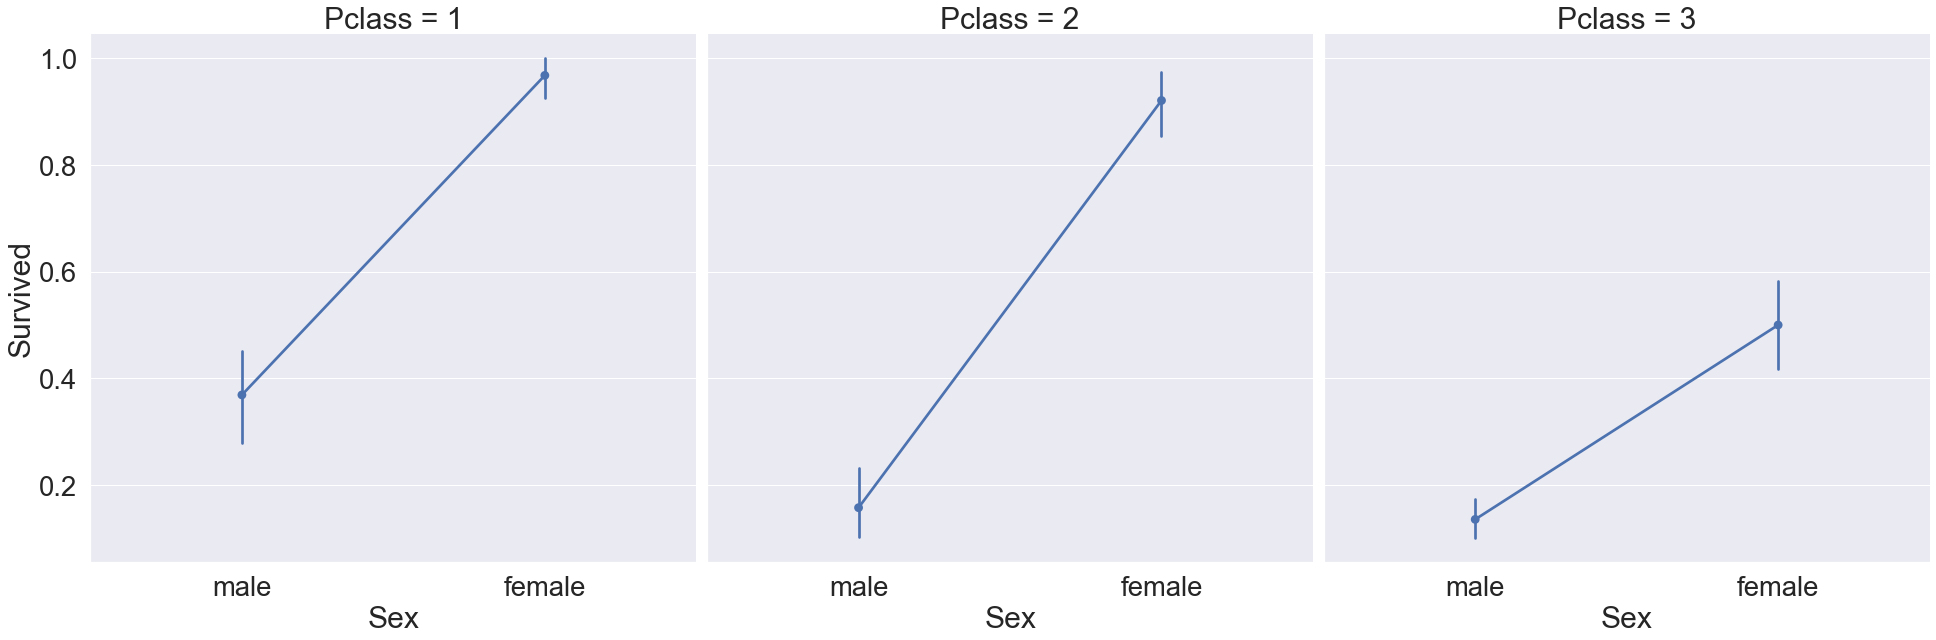

In [22]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=5,size=9,aspect=1)

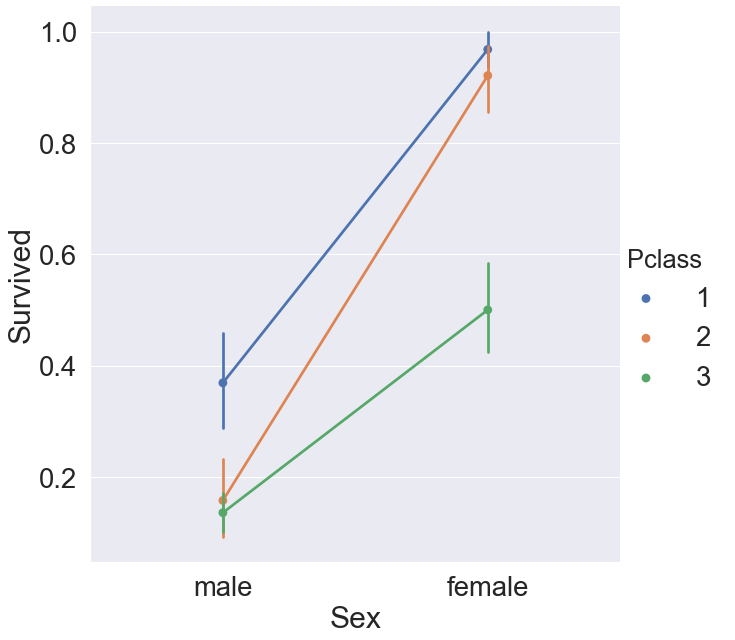

In [23]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=df_train,saturation=5,size=9,aspect=1)

## 2.4 Age

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 Histogram

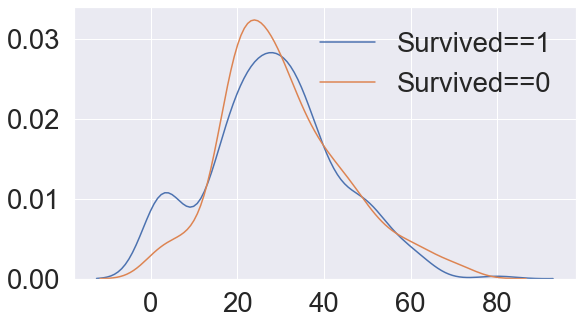

In [25]:
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

- 쉽게 얘기하면 히스토그램 같은 분포를 스무딩~ 부드럽게 곡선화(?) 시켜서 그려주는 것

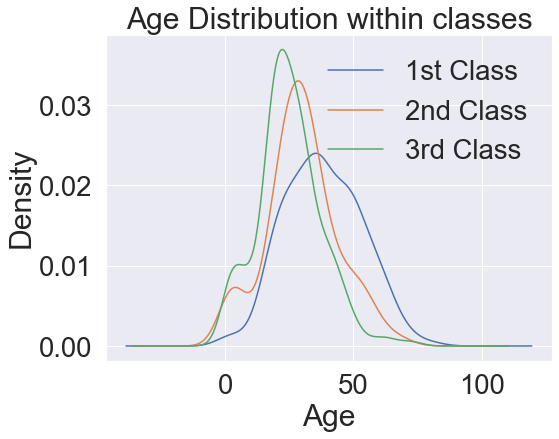

In [26]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']== 1].plot(kind='kde')
df_train['Age'][df_train['Pclass']== 2].plot(kind='kde')
df_train['Age'][df_train['Pclass']== 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])
plt.show()

- class가 높을수록 나이 많은 사람의 비중이 크다
- 나이대가 변하면서 생존률이 어떻게 되는 지 알고 싶다
- 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보자

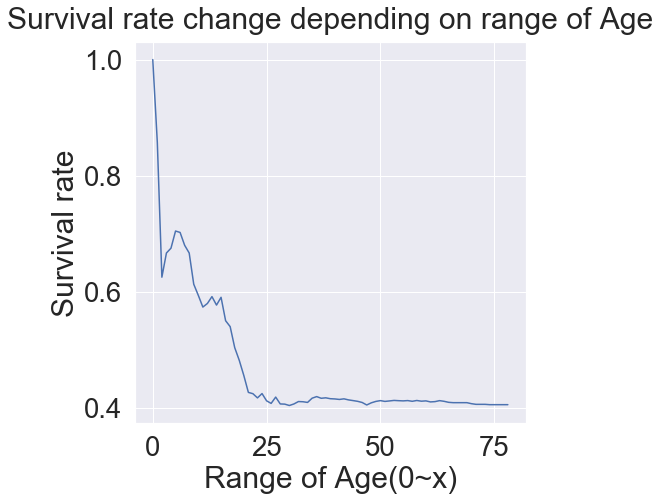

In [27]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 확실히 높다.
- 나이가 중요한 feature로 쓰일 수 있음을 확인했다.

## 2.5 Pclass, Sex, Age

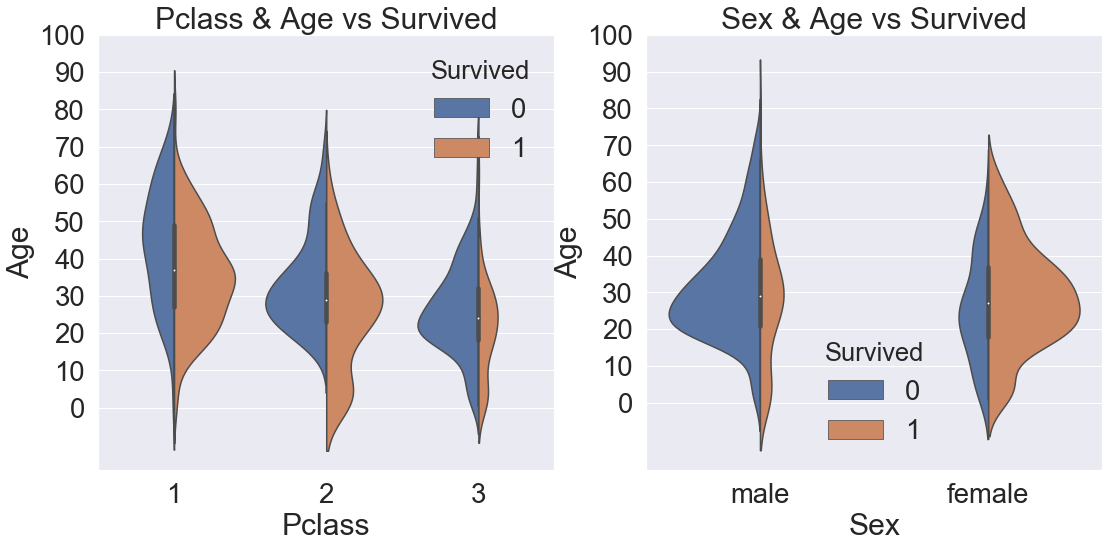

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass & Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex & Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 생존만 보았을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 알 수 있다.
- 또한 여자가 많이 생존을 많이 한 것을 볼 수 있다.
- 즉, 여성과 아이를 많이 챙겼다는 것이다.

## 2.6 Embarked

- Embarked는 탑승한 항구를 나타낸다.

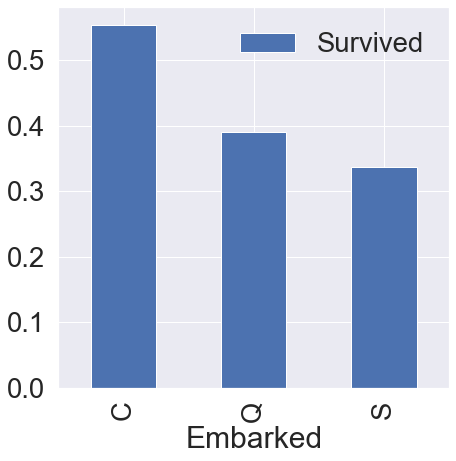

In [29]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby('Embarked',as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

- 생존률은 조금의 차이가 있지만, 비슷하다. 그렇지만 C에서 제일 높게 나타나는 중이다.

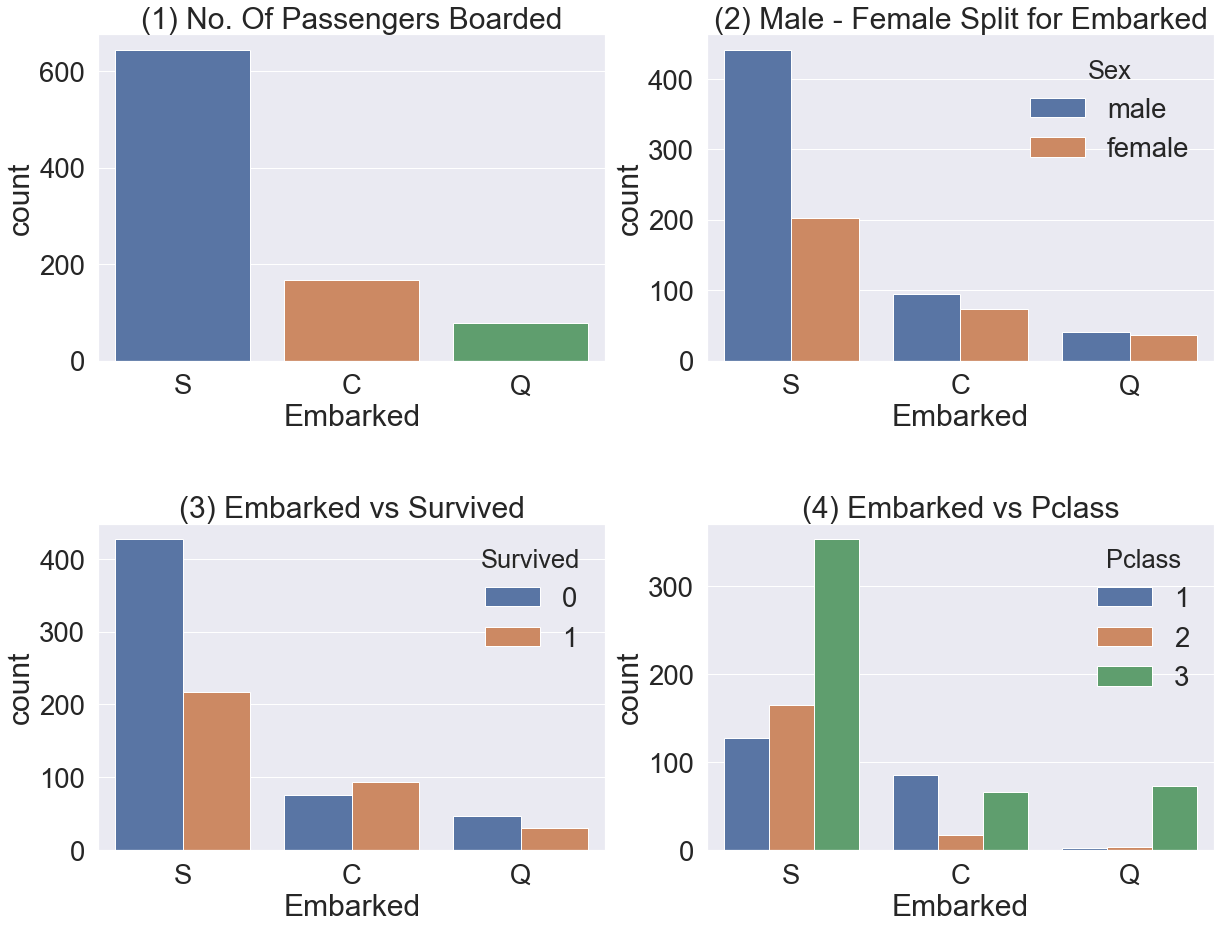

In [30]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male - Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5) # 좌우간격, 상하 간격을 맞춰주는 것
plt.show()

- Figure(1) - 전체적으로 S에서 가장 많은 사람이 탑승하였다.
- Figure(2) - C와Q는 남녀비율이 비슷하고, S는 남자가 더 많이 탑승하였다.
- Figure(3) - S경우 많은 사람들이 죽었다.
- Figure(4) - C가 생존확률이 높은 것은 클래스가 높은 사람이 많이 타서 그렇다. S는 3rd Class가 많아서 생존확률이 낮다.

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

- SibSp와 Parch를 합치면 Family가 될 것이다. Family로 합쳐서 분석

In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [32]:
print('최대 가족 수 : {:.0f} 명'.format(df_train['FamilySize'].max()))
print('최소 가족 수 : {:.0f} 명'.format(df_train['FamilySize'].min()))

최대 가족 수 : 11 명
최소 가족 수 : 1 명


### FamilySize와 생존관계

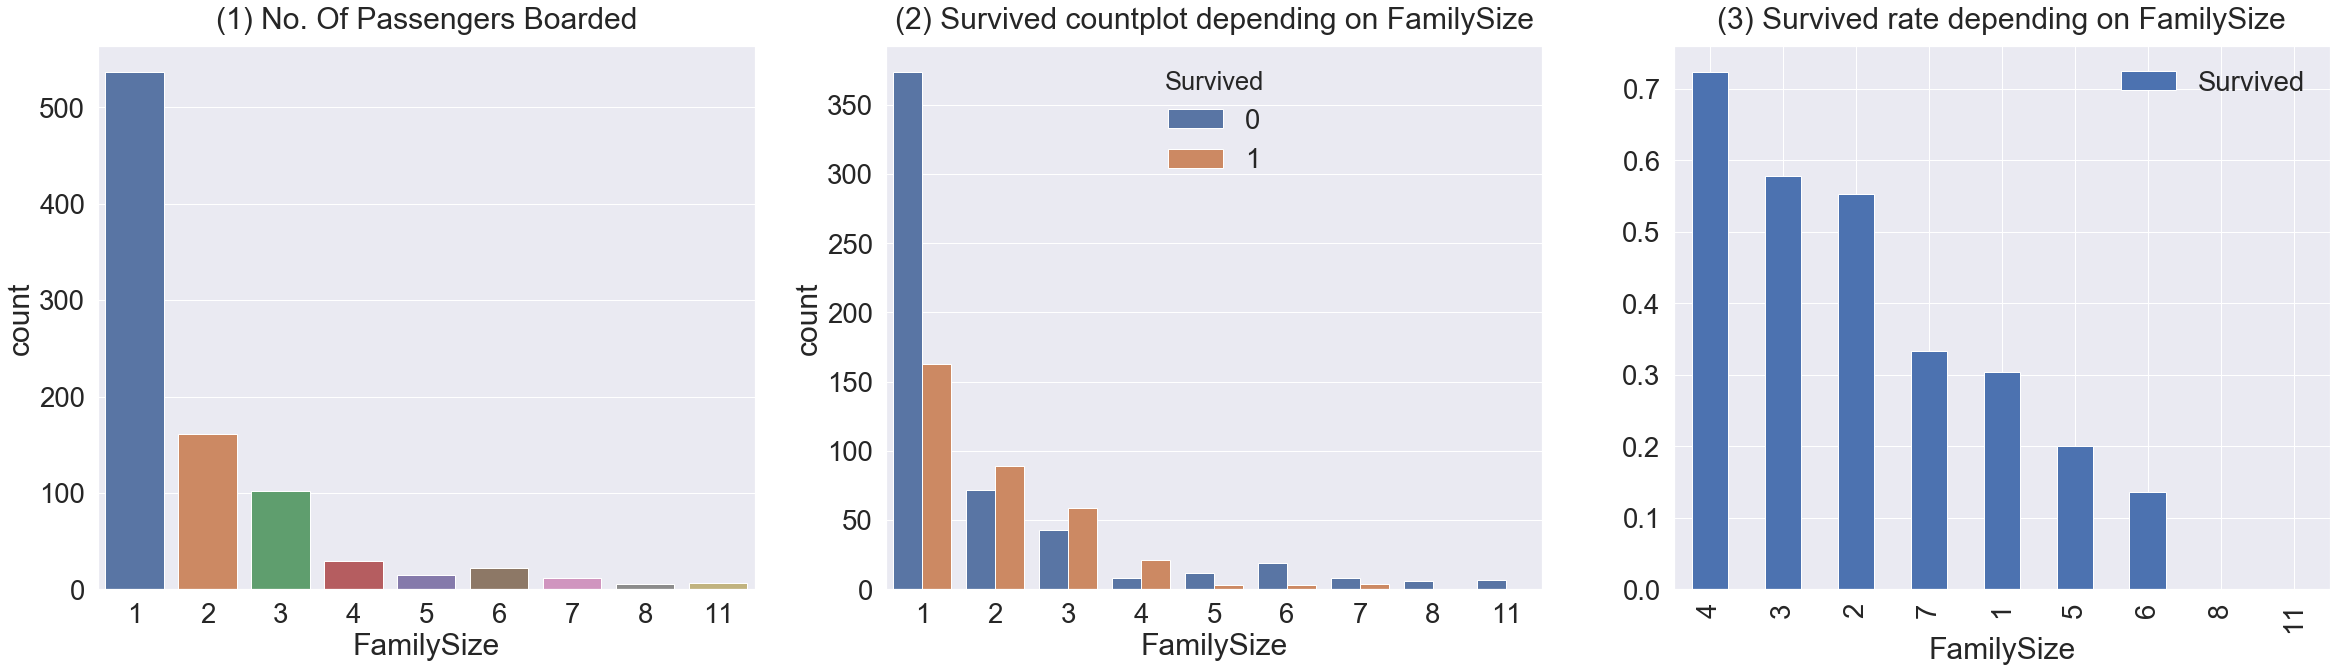

In [33]:
f,ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby('FamilySize',as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()

- Figure(1) - 대부분 1명
- Figure(2),(3) - 가족이 4명인 경우, 생존확률이 높다. 가족 수가 많아질수록 생존확률이 작아진다.
- 가족수가 너무 작아도(1명), 너무 많아도(5,6,8,11) 생존 확률이 작다. 3~4명 선에서 생존확률이 높은 것으로 확인

## 2.8 Fare

- Fare는 탑승요금, contious feature

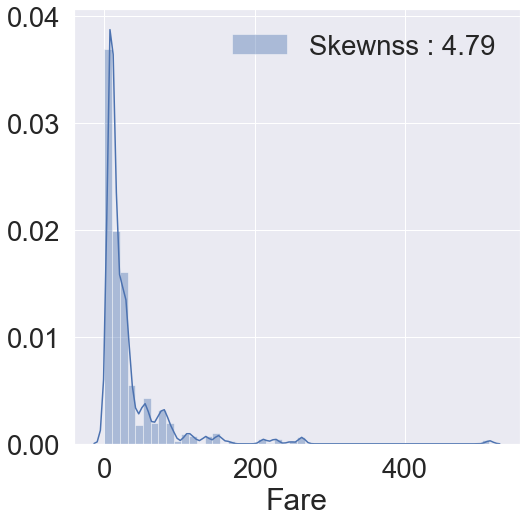

In [34]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color = 'b', label = 'Skewnss : {:.2f}'.format(df_train['Fare'].skew(),ax=ax))
# skewness는 왜도 : 얼마나 쏠려있는지 알 수 있다.
g=g.legend(loc='best')

- 매우 비대칭적이다(high skewness)
- 모델에 넣어 학습시키면, 잘못 학습이 될 수 있다. 
- outlier의 영향을 줄이기 위해, Fare에 log를 취한다.
- map이나 apply를 적용하면 매우 손쉽게 적용가능하다.

In [35]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean() # 결측값 처리

In [36]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

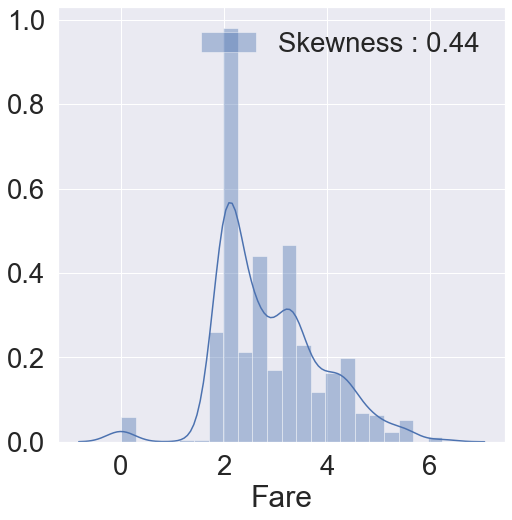

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

- 이 Feature는 NaN이 약 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.
- 우리가 세우려는 모델에 포함시키지 않을 것

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

- 이 Feature는 NaN이 없다.
- 일단 String Data이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해서는 사실 아이디어가 필요하다.

In [39]:
df_train['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
113760                4
347077                4
LINE                  4
4133                  4
349909                4
19950                 4
2666                  4
113781                4
17421                 4
PC 17757              4
W./C. 6608            4
35273                 3
110413                3
13502                 3
PC 17572              3
PC 17755              3
F.C.C. 13529          3
29106                 3
239853                3
SC/Paris 2123         3
363291                3
347742                3
                     ..
111240                1
244310                1
349254                1
28665                 1
112059                1
19972                 1
3411                  1
C.A. 6212             1
364846                1
28664                 1
347076          

In [50]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import plotly.offline as py
import plotly.graph_objs as go

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [110]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean() # 결측값을 평균으로 대체

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

## 3. Feature Engineering

- Null Data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기에 신경써야한다.
- train뿐 아니라, test에서도 똑같이 적용해줘야한다.

### 3.1 Fill Null

#### 3.11 Fill Null in Age using title

- pandas에서 extract를 통해 정규표현식 넣어주면 그에 맞는 데이터를 리턴해준다.

In [113]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

- crosstab을 이용하여 Initial과 Sex를 Count

In [114]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [115]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

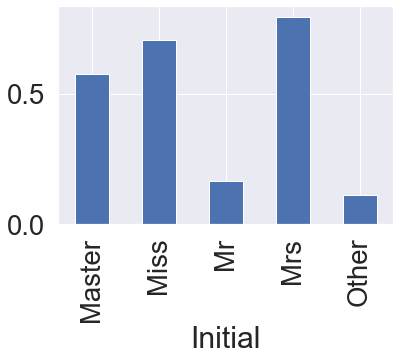

In [116]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [117]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해 Null Value를 채우도록 하겠습니다.
- Pandas DataFrame을 다룰 때는 boolean array를 이용해 indexing 하는 방법이 참으로 편리
- loc + boolean + column을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해지자

#### 간단하게 Null 값 채우기

In [123]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [125]:
print('Embarked has ',sum(df_train['Embarked'].isnull()), ' Null Values.')

Embarked has  2  Null Values.


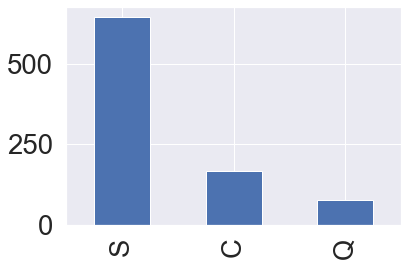

In [126]:
df_train['Embarked'].value_counts().plot.bar()

In [127]:
df_train['Embarked'].fillna('S',inplace=True)

## 3.2 Change Age(continuous to categorical)

- Age를 그룹으로 나누어 category화 시켜줄 수 있다.
- continuous를 categorical로 바꾸면 자칫 information loss가 생길 수 있다.

- loc를 이용한 방법도 있고, apply를 사용해 함수 넣어주는 방법도 있다.

### loc 사용한 방법

In [132]:
def categorical_age(x) :
    if x < 10 : 
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4
    elif x < 60 :
        return 5
    elif x <70 :
        return 6
    else :
        return 7

df_train['Age_cat'] = df_train['Age'].apply(categorical_age)

In [134]:
df_test['Age_cat'] = df_test['Age'].apply(categorical_age)

In [135]:
df_train.drop(['Age'],axis = 1, inplace = True)
df_test.drop(['Age'],axis = 1,inplace = True)

## 3.3 Change Initial, Embarked and Sex(string to numerical)

- 컴퓨터가 인식할 수 있도록 수치화시켜야한다

In [139]:
df_train['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [140]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [142]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0,'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0,'Q' : 1, 'S' : 2})

In [143]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

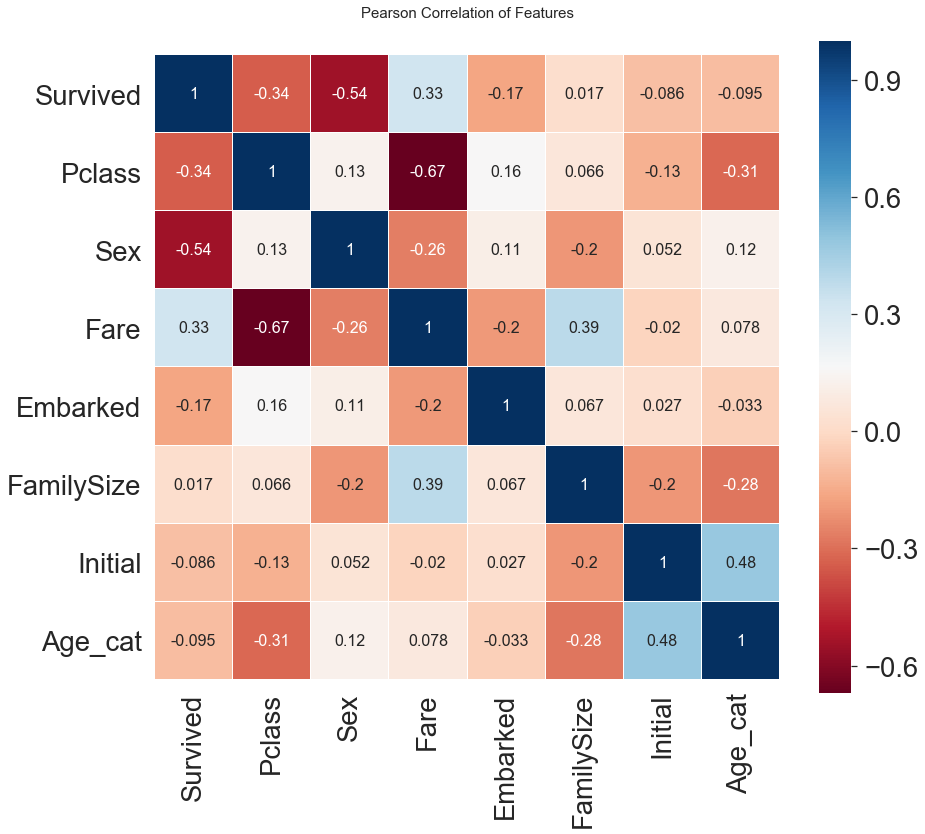

In [144]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1, vmax = 1.0, square= True, cmap=colormap,
           linecolor='white',annot=True,annot_kws={'size' : 16})

del heatmap_data

## 3.4 One-hot encoding on Initial and Embarked

- 모델의 성능을 높이기 위해, one-hot Encoding
- pandas의 Get_dummies를 이용하여 해결

In [148]:
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial') # prefix = 원래 함수는 날라간다
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [149]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 3.5 Drop Columns

In [151]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

# 4 Building machine learning model and prediction using the trained model

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 4.1 Preparation - Split dataset into train, valid, test set

In [154]:
X_train = df_train.drop('Survived',axis =1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [155]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 4.2 Model Generation and Prediction

In [156]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction = model.predict(X_vld)

In [157]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞추었다.'.format(y_vld.shape[0],100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 81.72% 정확도로 생존을 맞추었다.


## 4.3 Feature importance

- 지금 만든 모델이 어떤 Feature에 영향을 많이 받았는지 확인할 수 있다.

In [158]:
from pandas import Series

feature_importance = model.feature_importances_

Series_feat_imp = Series(feature_importance,index = df_test.columns)

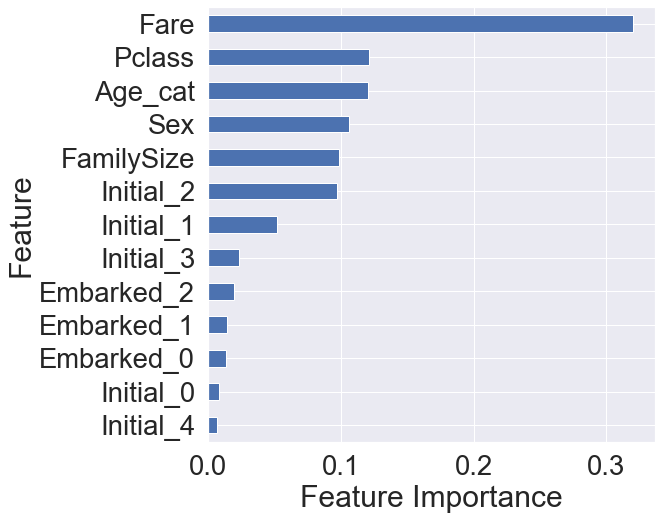

In [159]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- 이 feature importance 를 보고 실제로 Fare 가 중요한 feature 일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀 더 살펴보긴 해야합니다.

## 4.4 Prediction & Test Set

In [160]:
submission = pd.read_csv('gender_submission.csv')

In [161]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [162]:
prediction = model.predict(X_test)


In [163]:
submission['Survived'] = prediction